# Grupo 20 -Competição ML @SBS/DAA - Edição 2023/2024

### The Data
We will be using the datasets:
- meteo_202109-202112.csv
- meteo_202201-202212.csv
- meteo_202301-202304.csv (test)
- energia_202109-202112.csv
- energia_202201-202212.csv
- energia_202301-202304.csv (test)


Features dos Datasets de Energia

- Data - o timestamp associado ao registo, ao dia;
- Hora - a hora associada ao registo;
- Normal (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
- Horário Económico (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
- Autoconsumo (kWh) - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
- Injeção na rede (kWh) - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

Features dos Datasets de meteorologia:

- dt - o timestamp associado ao registo;
- dt_iso - a data associada ao registo, ao segundo;
- city_name - o local em causa;
- temp - temperatura em ºC;
- feels_like - sensação térmica em ºC;
- temp_min - temperatura mínima sentida em ºC;
- temp_max - temperatura máxima sentida em ºC;
- pressure - pressão atmosférica sentida em atm;
- sea_level - pressão atmosférica sentida ao nível do mar em atm;
- grnd_level - pressão atmosférica sentida à altitude local em atm;
- humidity - humidade em percentagem;
- wind_speed - velocidade do vento em metros por segundo;
- rain_1h - valor médio de precipitação;
- clouds_all - nível de nebulosidade em percentagem;
- weather_description - avaliação qualitativa do estado do tempo.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

We'll use the built in hotel bookings dataset from Scikit Learn. We can get with the load function:

In [2]:
data_energia1 = pd.read_csv('energia_202109-202112.csv',encoding='utf-8')
data_energia2 = pd.read_csv('energia_202201-202212.csv',encoding='utf-8')
data_energia3 = pd.read_csv('energia_202301-202304.csv',encoding='utf-8')

data_meteo1 = pd.read_csv('meteo_202109-202112.csv',encoding='utf-8')
data_meteo2 = pd.read_csv('meteo_202201-202212.csv',encoding='utf-8')
data_meteo3 = pd.read_csv('meteo_202301-202304.csv',encoding='utf-8')

data_energia = pd.concat([ data_energia1,data_energia2] )
data_meteo   = pd.concat([ data_meteo1,data_meteo2] )

data_energia_original = data_energia.copy()
data_meteo_original = data_meteo.copy()
data_energia3_original = data_energia3.copy()
data_meteo3_original = data_meteo3.copy()

In [3]:
print(data_energia.columns)
print(data_meteo.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')


In [4]:
print(data_energia.info())
print(data_meteo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 602.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 11688 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   11688 non-null  int64  
 1   dt_iso               11688 non-null  object 
 2   city_name            11688 non-null  object 
 3   temp                 11688 non-null  fl

In [5]:
print(data_energia.head())
print(data_meteo.head())

         Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
           dt                         dt_iso city_name   temp  feels_like  \
0  1630454400  2021-09-01 00:00:00 +0000 UTC     local  18.74       18.84   
1  1630458000  2021-09-01 01:00:00 +0000 UTC     local  18.73       18.83   
2  1630461600  2021-09-01 02:00:00 +0000 UTC     local  17.84       17.98   
3  1630465200  2021-09-01 03:00:00 +0000 UTC     

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

## 1. Missing Values

<Axes: >

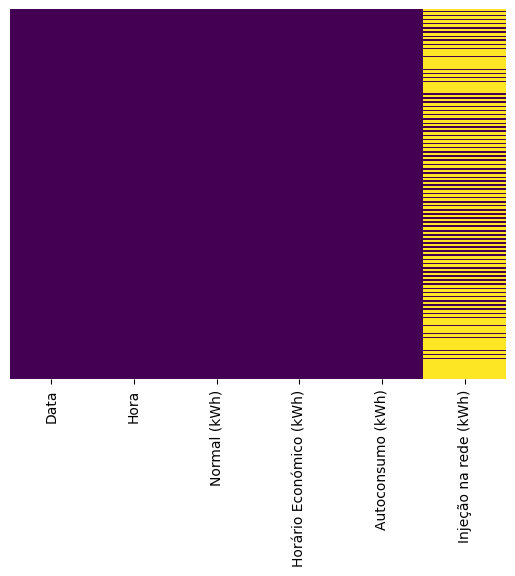

In [6]:
sns.heatmap(data_energia.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

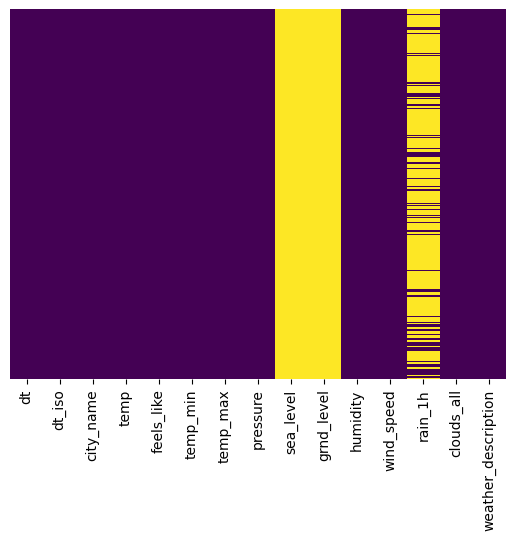

In [7]:
sns.heatmap(data_meteo.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
data_energia.isna().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      7777
dtype: int64

In [9]:
data_meteo.isna().sum()

dt                         0
dt_iso                     0
city_name                  0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              11688
grnd_level             11688
humidity                   0
wind_speed                 0
rain_1h                 9253
clouds_all                 0
weather_description        0
dtype: int64

### - Drop or fill
Let's verify how the data is presented in the feature <em>affected_roads</em>

In [10]:
data_energia = data_energia_original.copy()
data_energia3 = data_energia3_original.copy()

data_energia.drop_duplicates()
data_energia['Injeção na rede (kWh)'] = data_energia['Injeção na rede (kWh)'].fillna('0')
replace_map = {'Injeção na rede (kWh)': {'0':0,'Low' : 1, 'Medium' : 2,'High':3, 'Very High' : 4 }}
data_energia.replace(replace_map,inplace=True)
data_energia['Data'] = pd.to_datetime(data_energia['Data'] + ' ' + data_energia['Hora'].astype(str), format='%Y-%m-%d %H')

data_energia.drop(['Hora'],axis=1,inplace=True)

data_energia3['Data'] = pd.to_datetime(data_energia3['Data'] + ' ' + data_energia3['Hora'].astype(str), format='%Y-%m-%d %H')
data_energia3.drop(['Hora'],axis=1,inplace=True)
print(data_energia.info())
print(data_energia['Injeção na rede (kWh)'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 516.4 KB
None
Injeção na rede (kWh)
0    7777
3    1103
2    1098
4     606
1     432
Name: count, dtype: int64


In [11]:
def convert(value):
    return value[0:19]
def altera_dataset_meteo(data_meteo, remove_rows=True):
    data_meteo.drop(['sea_level','grnd_level'],axis=1,inplace=True)
    if remove_rows:
        data_meteo.drop_duplicates()
    data_meteo['rain_1h'] = data_meteo['rain_1h'].fillna(0)
    replace_map = {'weather_description': {'heavy intensity rain': 1, 
                                           'moderate rain'       : 2, 
                                           'light rain'          : 3, 
                                           'overcast clouds'     : 4, 
                                           'broken clouds'       : 5,  
                                           'scattered clouds'    : 6, 
                                           'few clouds'          : 7 , 
                                           'sky is clear'        : 8}}
    data_meteo.replace(replace_map,inplace=True)
    data_meteo['dt_iso'] = data_meteo['dt_iso'].map(convert)
    data_meteo['dt_iso'] = pd.to_datetime(data_meteo['dt_iso'], format='%Y-%m-%d %H:%M:%S')
    data_meteo['Data'] = data_meteo['dt_iso']
    data_meteo.drop(['dt_iso'],axis=1,inplace=True)



data_meteo = data_meteo_original.copy()
data_meteo3 = data_meteo3_original.copy()
altera_dataset_meteo(data_meteo)
altera_dataset_meteo(data_meteo3,remove_rows=False)
print(data_meteo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11688 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt                   11688 non-null  int64         
 1   city_name            11688 non-null  object        
 2   temp                 11688 non-null  float64       
 3   feels_like           11688 non-null  float64       
 4   temp_min             11688 non-null  float64       
 5   temp_max             11688 non-null  float64       
 6   pressure             11688 non-null  int64         
 7   humidity             11688 non-null  int64         
 8   wind_speed           11688 non-null  float64       
 9   rain_1h              11688 non-null  float64       
 10  clouds_all           11688 non-null  int64         
 11  weather_description  11688 non-null  int64         
 12  Data                 11688 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int

In [12]:
print(data_energia.shape)
print(data_meteo.shape)

(11016, 5)
(11688, 13)


In [13]:
data = pd.merge(data_energia, data_meteo, on='Data', how='inner')
print(data_energia3.info())
print(data_meteo3.info())
data_test = pd.merge(data_energia3, data_meteo3, on='Data', how='outer')
print(data.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 88.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt                   1752 non-null   int64         
 1   city_name            1752 non-null   object        
 2   temp                 1752 non-null   float64       
 3   feels

In [14]:
def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

def grafico_setor(atr,data):
    labels = data[atr].astype('category').cat.categories.tolist()
    counts = data[atr].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()
    
def graficos_pontos(data):
    sns.pairplot(data)
    
def caixa_bigodes(data,x,y):
    plt.figure(figsize=(12,7))    
    sns.boxplot(x=x,y=y,data=data,palette='winter')

def matriz_correlacao(data):
    sns.heatmap(data.corr(numeric_only=False))
    
def matriz_correlacao_num(data):
    corr_matrix = data.corr(numeric_only=False)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.show()

In [15]:
from datetime import datetime
data['Mes'] = data['Data'].dt.month
data['Hora'] = data['Data'].dt.hour
data_test['Mes']  = data_test['Data'].dt.month
data_test['Hora'] = data_test['Data'].dt.hour

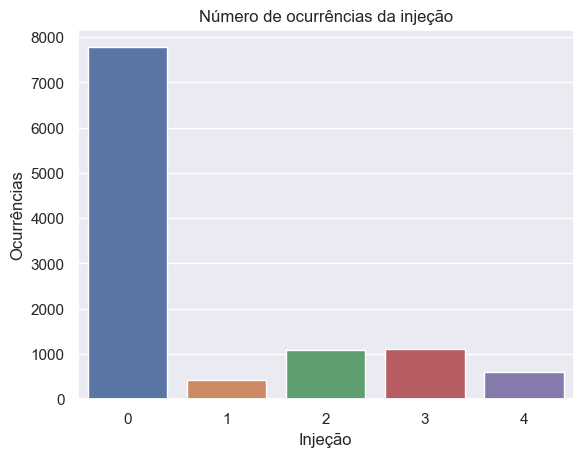

In [16]:
# histograma
grafico_barras(data,'Injeção na rede (kWh)','Número de ocurrências da injeção','Injeção','Ocurrências')
# Podemos concluir que temos bastantes casos de falhados

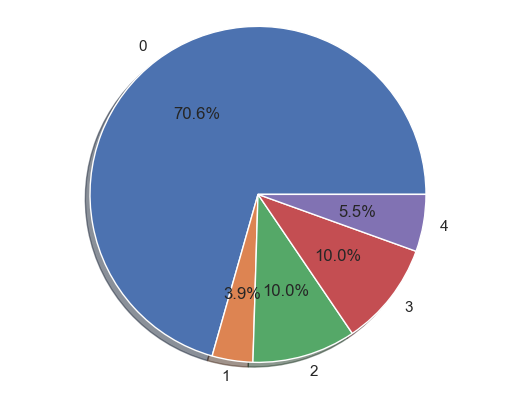

In [17]:
# Gráfico setor/circular
grafico_setor('Injeção na rede (kWh)',data)
# 59.8% falhados, 40.2% sucessos

In [18]:
# grafico de pontos
# graficos_pontos(data)

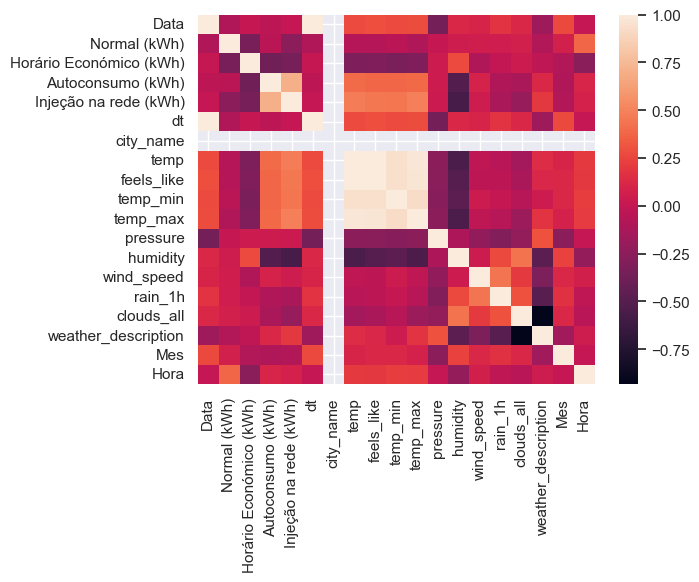

In [19]:
def converter(data,atr):
    data[atr]=data[atr].astype('category').cat.codes

data_copy = data.copy()
for atr in ['city_name']:
    converter(data_copy,atr)
    
matriz_correlacao(data_copy)

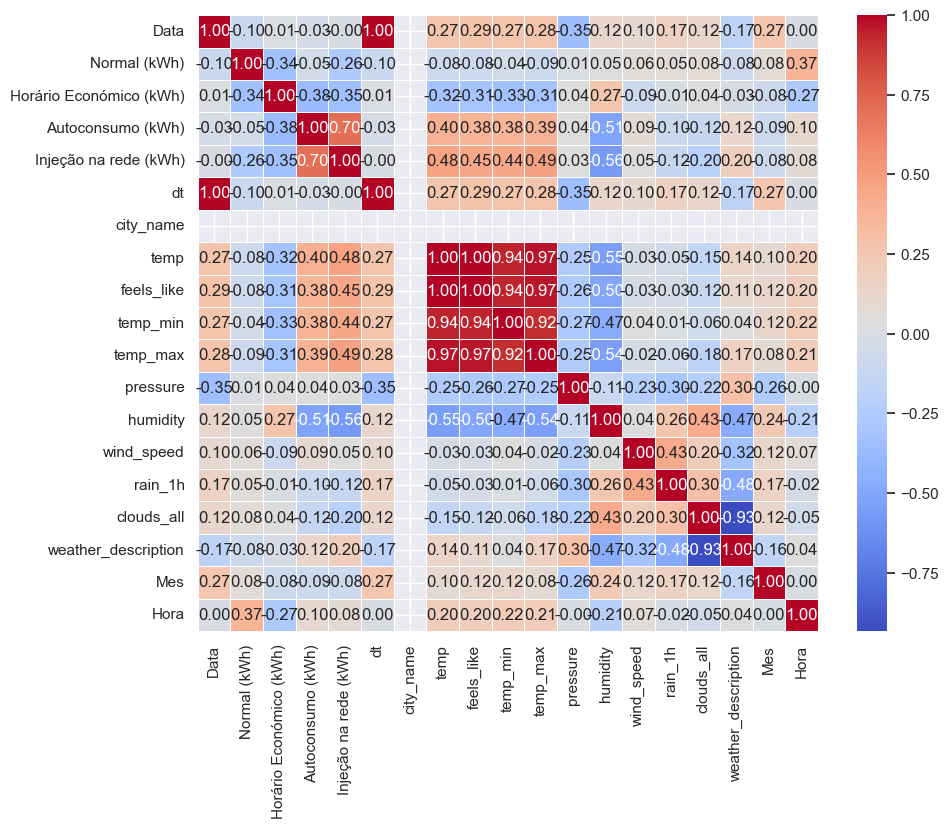

In [20]:
matriz_correlacao_num(data_copy)

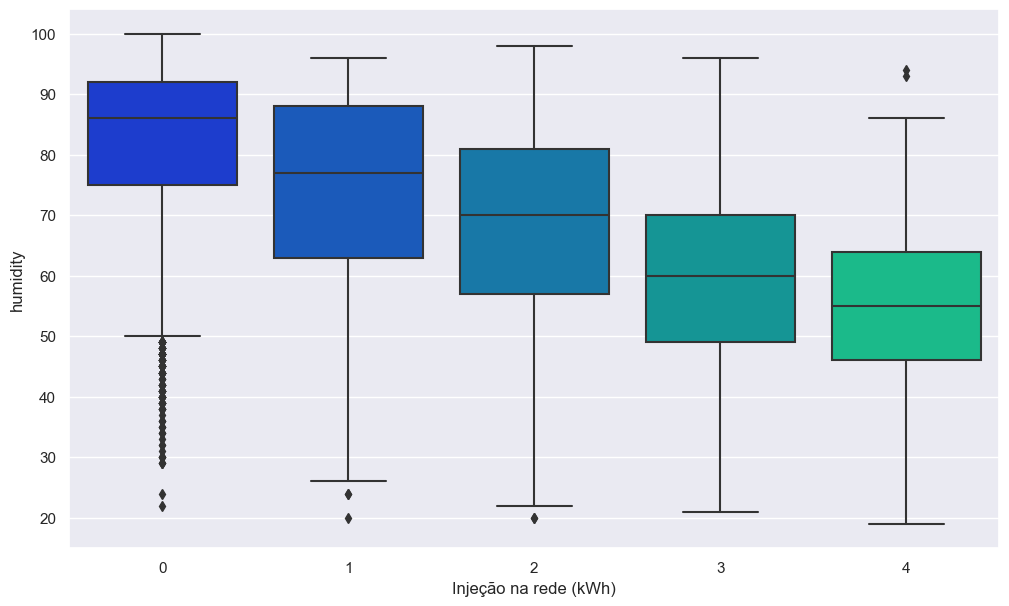

In [21]:
caixa_bigodes(data,'Injeção na rede (kWh)','humidity')

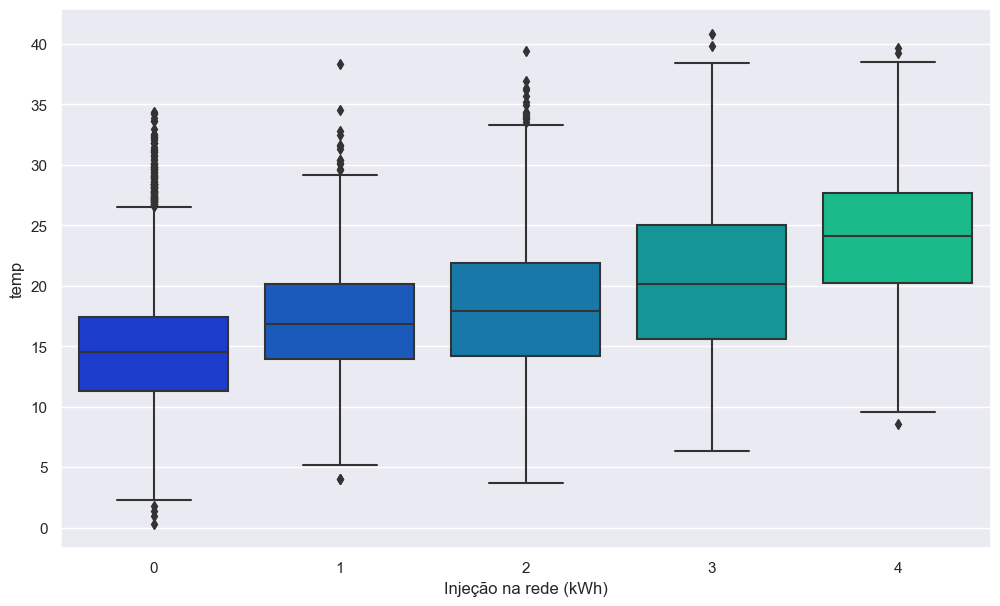

In [22]:
# caixa de bigodes currency -> state
caixa_bigodes(data,'Injeção na rede (kWh)','temp')

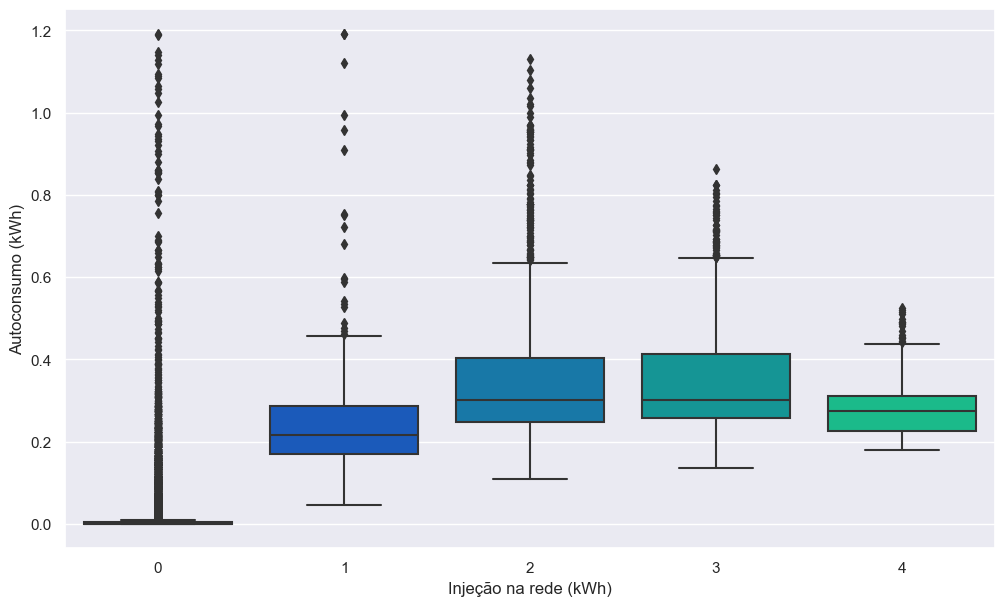

In [23]:
caixa_bigodes(data,'Injeção na rede (kWh)','Autoconsumo (kWh)')

In [24]:
%store data
%store data_test

Stored 'data' (DataFrame)
Stored 'data_test' (DataFrame)


#### e) Backward difference encoding
The values are normalized in the range of -1 to 1.

#### f) Factorize
This technique encodes the object as an enumerated type or categorical variable.

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,2
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,4
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,1


We will choose the factorize technique to keep going.

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,2
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,4
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,1


Regarding the features <em>magnitude_delay</em>, <em>luminosity</em> and <em>avg_rain</em>, we will factorize for now.

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,1,69,2021-03-12 15:00,1,14.0,1025.0,64.0,0.0,1,1
3,2,2297,2021-09-29 09:00,1,15.0,1028.0,75.0,1.0,1,2
4,1,0,2021-06-13 11:00,1,27.0,1020.0,52.0,1.0,1,3
5,1,0,2021-12-07 23:00,2,9.0,1015.0,94.0,0.0,1,4
6,1,0,2021-12-05 05:00,2,8.0,1026.0,87.0,1.0,1,1


## 3. Handling dates

Datetime Properties and Methods (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
5    2021-12-07 23:00
6    2021-12-05 05:00
Name: record_date, dtype: object

We are going to convert the dates from <em>object</em> to <em>datetime</em>, specifying the format we want:

2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
5   2021-12-07 23:00:00
6   2021-12-05 05:00:00
Name: record_date, dtype: datetime64[ns]

We can extract parts of the date and create newm columns with that:

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,1,1,2021,3,12,15,0
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,1,2,2021,9,29,9,0
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,1,3,2021,6,13,11,0
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,1,4,2021,12,7,23,0
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,1,1,2021,12,5,5,0


magnitude_of_delay       3
delay_in_seconds      1167
record_date           2972
luminosity               3
avg_temperature         34
avg_atm_pressure        34
avg_humidity            80
avg_wind_speed          11
avg_rain                 4
incidents                4
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

Since the year and the minute have only one value, we will drop it.

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
2,1,69,1,14.0,1025.0,64.0,0.0,1,1,3,12,15
3,2,2297,1,15.0,1028.0,75.0,1.0,1,2,9,29,9
4,1,0,1,27.0,1020.0,52.0,1.0,1,3,6,13,11
5,1,0,2,9.0,1015.0,94.0,0.0,1,4,12,7,23
6,1,0,2,8.0,1026.0,87.0,1.0,1,1,12,5,5


Other functions to deal with dates

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_rain            2972 non-null   int64         
 9   incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 319.9 KB


2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
5   2021-12-07 23:00:00
6   2021-12-05 05:00:00
Name: record_date, dtype: datetime64[ns]

We can use <em>datetime.today</em> and fetch the actual date.

datetime.datetime(2023, 10, 25, 15, 9, 48, 195787)

It can be measured the time elapsed between the dates on the dataset and today.

2      957 days 00:09:48.195787
3      756 days 06:09:48.195787
4      864 days 04:09:48.195787
5      686 days 16:09:48.195787
6      689 days 10:09:48.195787
                 ...           
4991   760 days 21:09:48.195787
4992   899 days 04:09:48.195787
4993   853 days 23:09:48.195787
4994   853 days 17:09:48.195787
4995   925 days 15:09:48.195787
Name: record_date, Length: 2972, dtype: timedelta64[ns]

2       957
3       756
4       864
5       686
6       689
       ... 
4991    760
4992    899
4993    853
4994    853
4995    925
Name: record_date, Length: 2972, dtype: int64

And we can also separate each component of the date by day, month, hour, time, etc.

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,day,month,hour,time
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,1,1,12,3,15,15:00:00
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,1,2,29,9,9,09:00:00
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,1,3,13,6,11,11:00:00
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,1,4,7,12,23,23:00:00
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,1,1,5,12,5,05:00:00


Now we need to choose how to deal with the <em>record_date</em>.

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_rain            2972 non-null   int64         
 9   incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 319.9 KB


There are other features that need to be worked on, but it's up to you now!

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,1,1
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,1,2
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,1,3
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,1,4
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,1,1


Let's analyze through a heatmap

<Axes: >

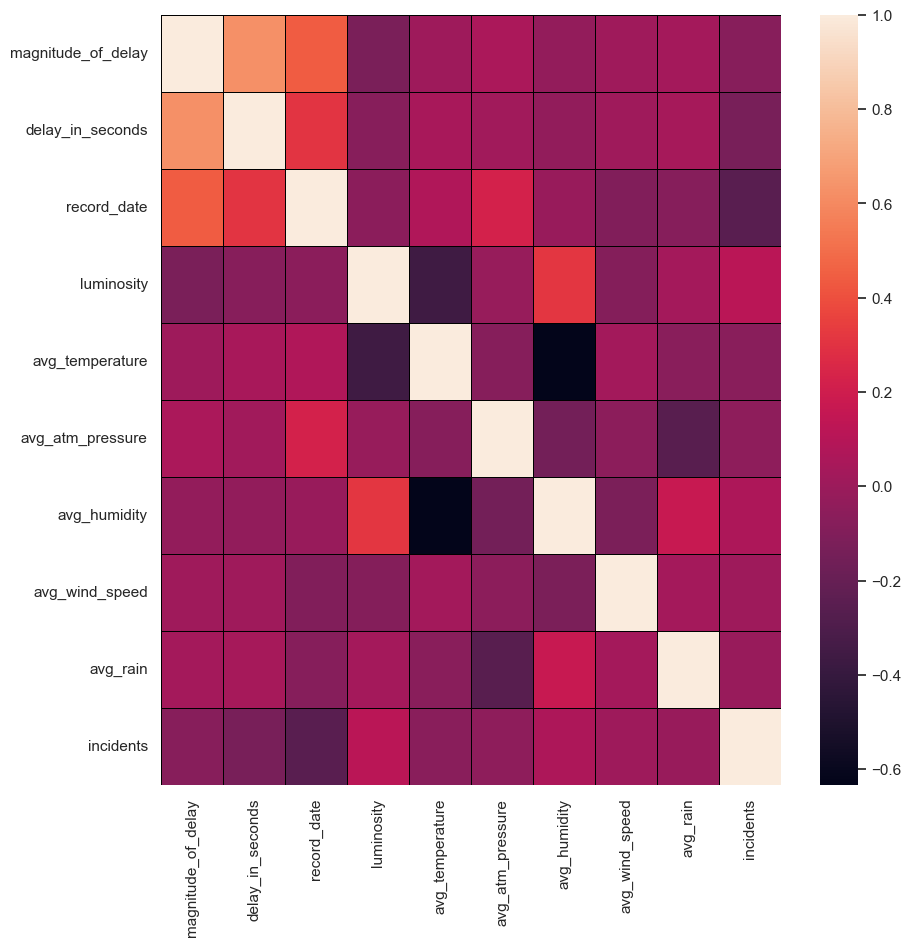

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship.

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

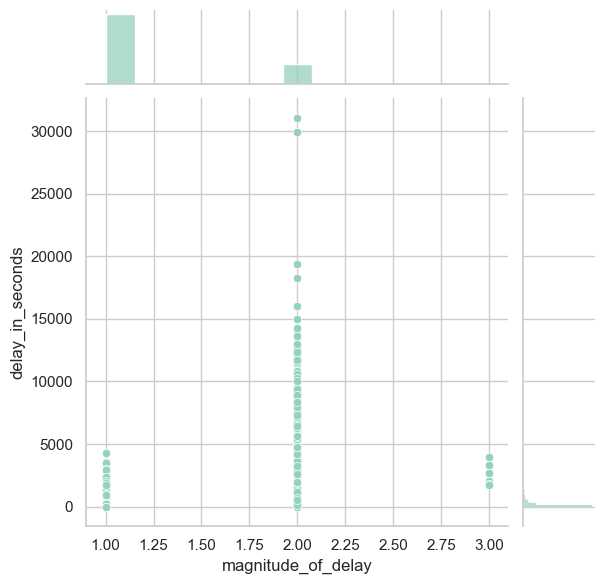

Jointplot <em>Luminosity vs. Avg_temperature</em>

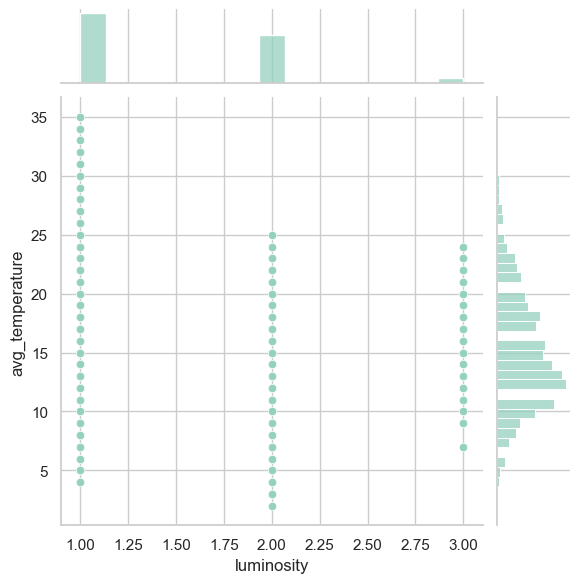

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

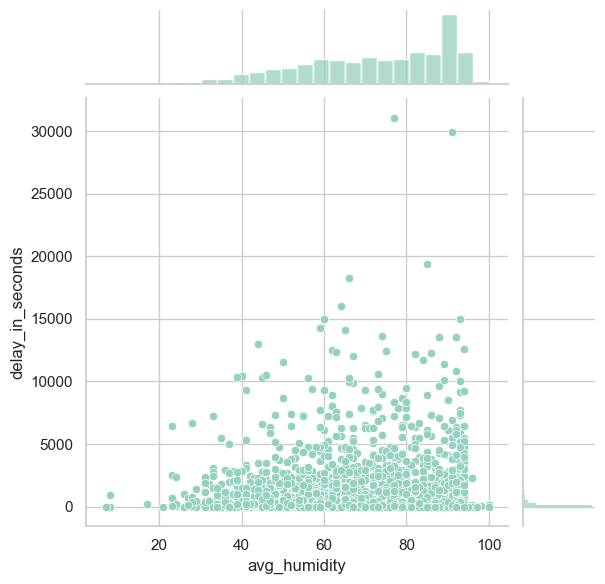

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

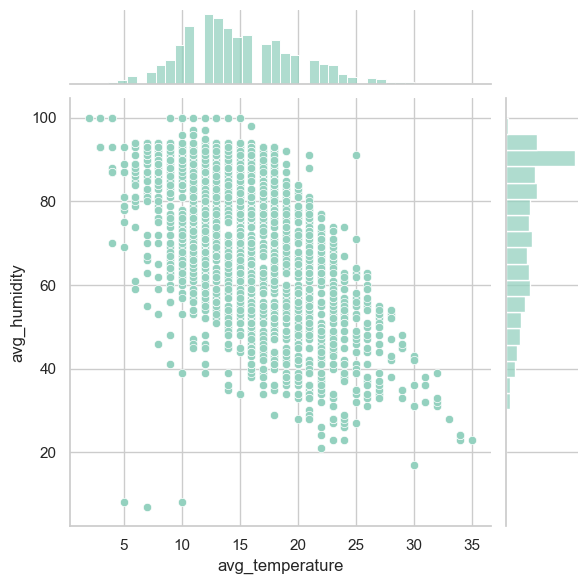

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_rain            2972 non-null   int64         
 9   incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 319.9 KB


,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,1,1
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,1,2
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,1,3
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,1,4
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,1,1


# Train Test Split

Split the data into a training set and a testing set.

# Train a Model

Now it's time to train a Decision Tree Classifier. 

**Call the DecisionTreeClassifier() model from sklearn and fit the model to the training data.**

DecisionTreeClassifier(random_state=2022)

#### 1. Plot the resultant tree (plot_tree) and save it as figure (.png)

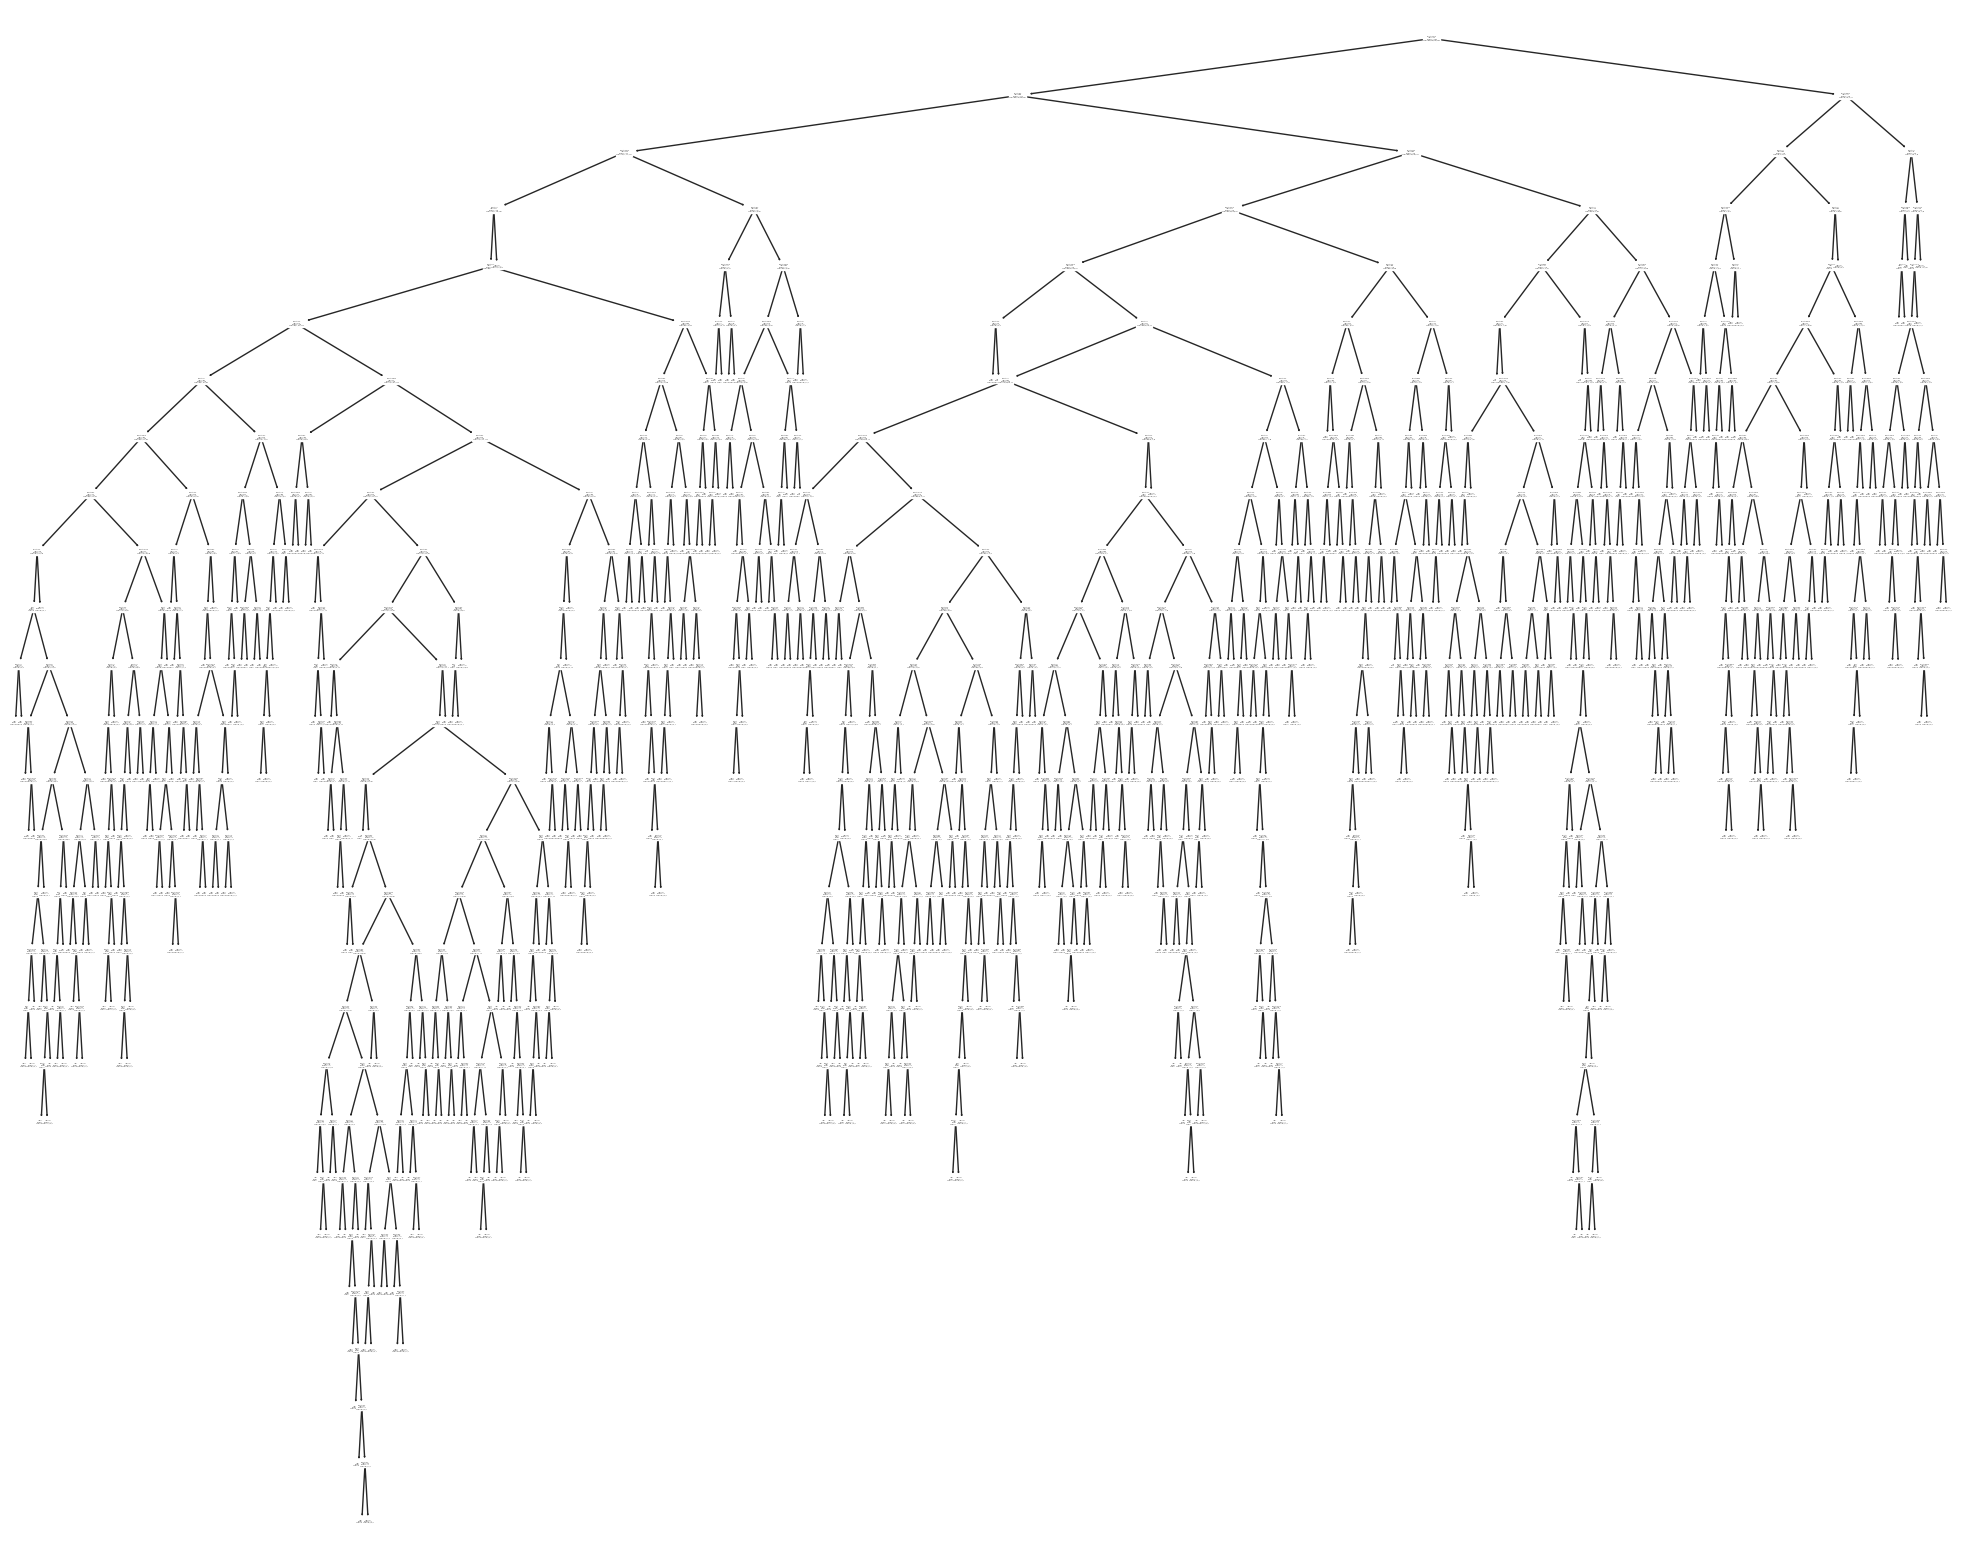

#### 2. Using export_text to represent the tree. Save it in a log file

|--- feature_1 <= 1367.50
|   |--- feature_1 <= 26.50
|   |   |--- feature_4 <= 1023.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- feature_5 <= 91.50
|   |   |   |   |   |--- feature_3 <= 13.50
|   |   |   |   |   |   |--- feature_6 <= 2.50
|   |   |   |   |   |   |   |--- feature_4 <= 1020.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 89.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 12.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- feature_1 >  12.50
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- feature_5 >  89.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 1014.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 10.50


# Model Evaluation

Now let's get predictions from the model and create a confusion matrix and a classification report.

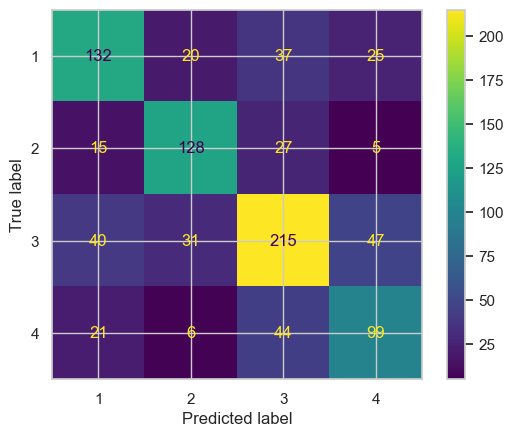

              precision    recall  f1-score   support

           1       0.63      0.62      0.63       214
           2       0.69      0.73      0.71       175
           3       0.67      0.65      0.66       333
           4       0.56      0.58      0.57       170

    accuracy                           0.64       892
   macro avg       0.64      0.64      0.64       892
weighted avg       0.64      0.64      0.64       892



Let's see if we can tune the parameters to try to get even better. It is unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## Gridsearch Practice

- Finding the right parameters is a tricky task
- The idea of creating a 'grid' of parameters and trying out all the possible combinations is called a Gridsearch
    - This method is common enough that Scikit-learn has this functionality built in with GridSearchCV (CV stands for Cross-Validation)
    - GridSearchCV takes a dictionary that describes the parameters that should be tried and the model to train
    - The grid of parameters is defined as a dictionary where the keys are the parameters and the values are the settings to be tested

- GridSearchCV is a meta-estimator
- It takes an estimator like DTC and creates a new estimator that behaves exactly the same - in this case, like a classifier.
- You should add <em>refit=True</em> and choose verbose to whatever number you want (verbose means the text output describing the process).

26
653


What does fit do: 
- Runs the same loop with cross-validation to find the best parameter combination 
- Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation) to built a single new model using the best parameter setting

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

Now let's take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?

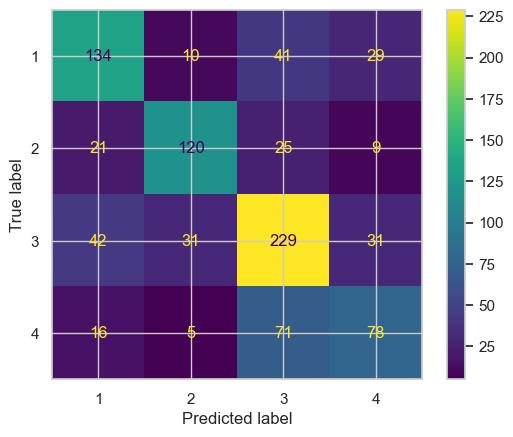

              precision    recall  f1-score   support

           1       0.63      0.63      0.63       214
           2       0.72      0.69      0.70       175
           3       0.63      0.69      0.66       333
           4       0.53      0.46      0.49       170

    accuracy                           0.63       892
   macro avg       0.63      0.61      0.62       892
weighted avg       0.63      0.63      0.63       892



## Pruning

Pruning of the DT is done by replacing a whole subtree by a leaf node.
If the expected error rate in the subtree is greater thant the single leaf,  it is made the replacement.

When to apply in Decision Trees:
- If the node gets very small, do not continue to split
- Minimum error (cross-validation) pruning without early stopping is a good technique
- Build a full-depth tree and work backward by applying a statistical test during each stage
- Prune an interior node and raise the sub-tree beneath it up one level

26
653


#### Best Depth Tree

26

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26]})

You can inspect the best parameters found by GridSearchCV in the **best_params_ attribute**, and the best estimator in the **best\_estimator_ attribute**:

{'max_depth': 18}

DecisionTreeClassifier(max_depth=18, random_state=42)


18


#### 1. Plot the tree (dpi=1000)

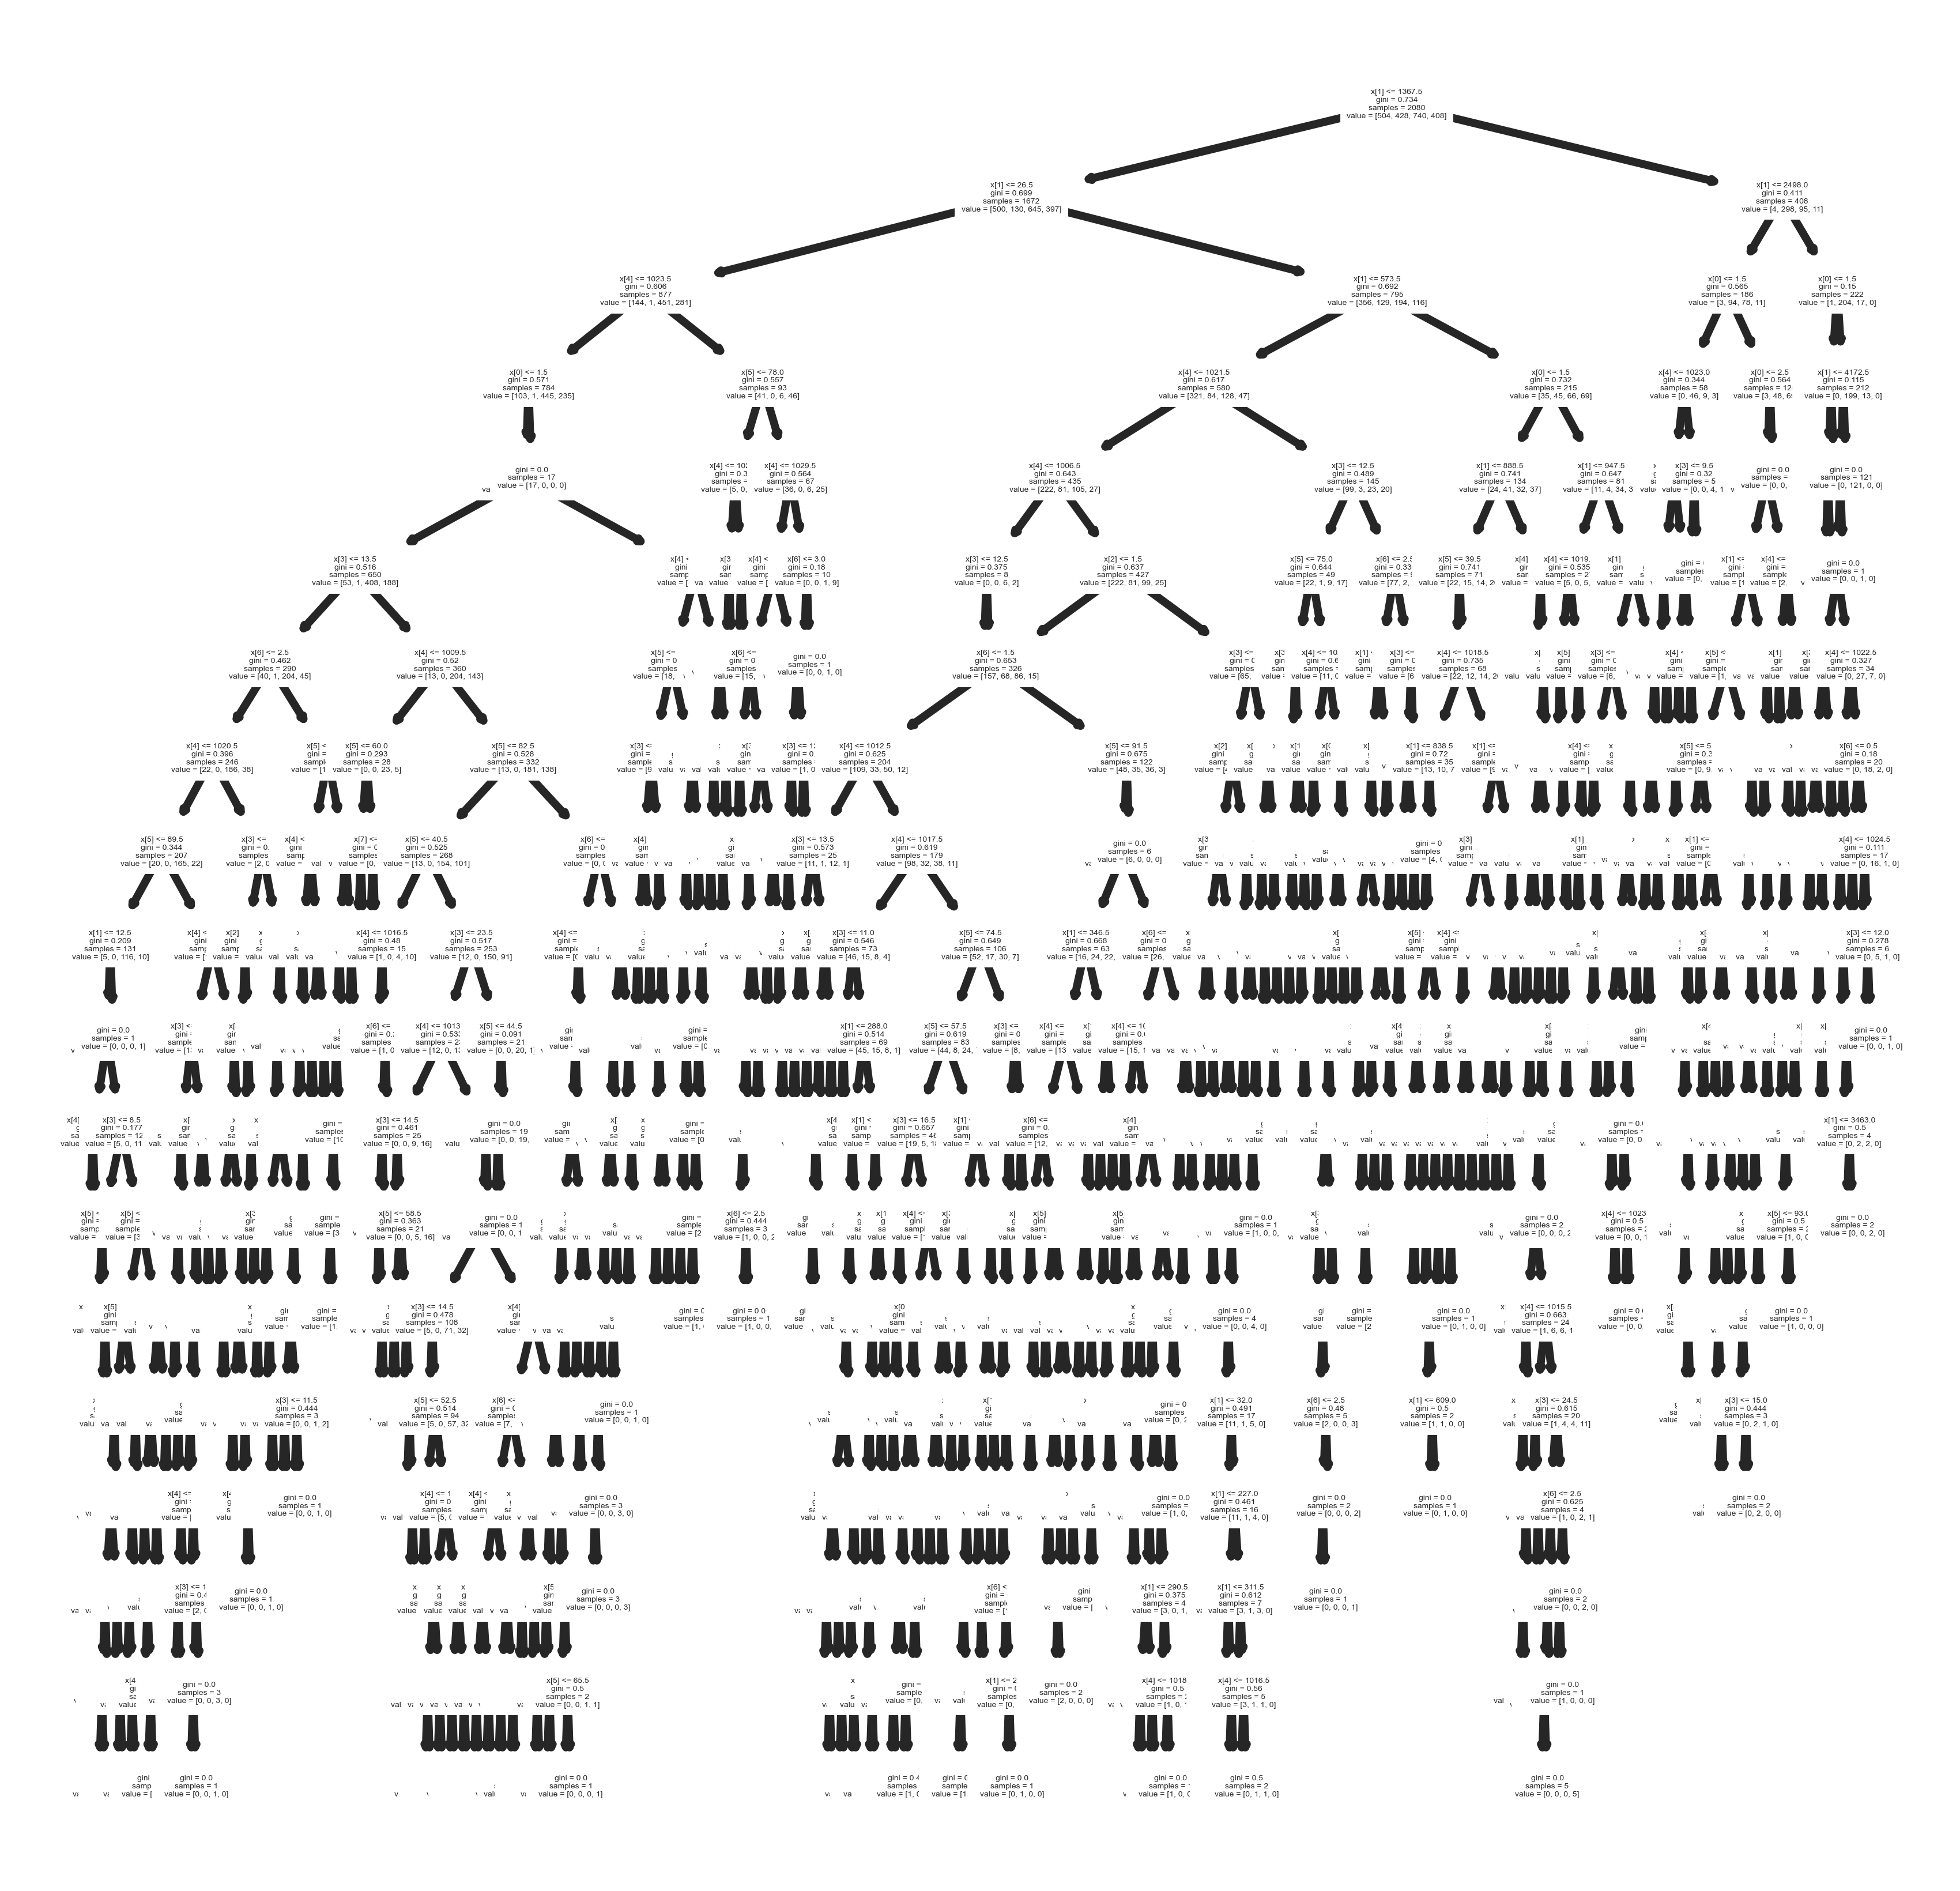

#### 2. Evaluate the model with confusion matrix  and classification report

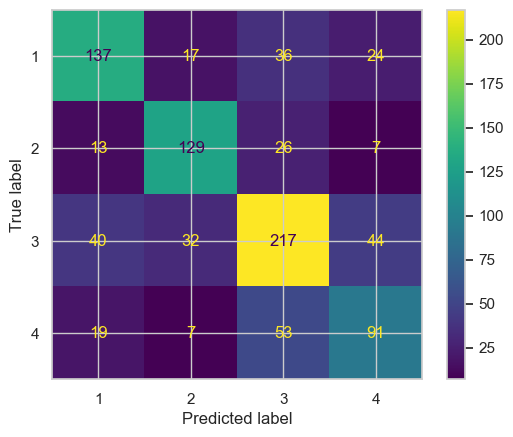

              precision    recall  f1-score   support

           1       0.66      0.64      0.65       214
           2       0.70      0.74      0.72       175
           3       0.65      0.65      0.65       333
           4       0.55      0.54      0.54       170

    accuracy                           0.64       892
   macro avg       0.64      0.64      0.64       892
weighted avg       0.64      0.64      0.64       892



#### Pruned Tree

array([0.        , 0.00012019, 0.00016026, 0.00016026, 0.00016026,
       0.00016026, 0.00023638, 0.00028846, 0.00030166, 0.00030364,
       0.00031384, 0.00032051, 0.00035131, 0.00036058, 0.00036058,
       0.00038462, 0.00038462, 0.00038462, 0.00038462, 0.00038729,
       0.00040064, 0.00040064, 0.00040064, 0.00040064, 0.00040064,
       0.00040064, 0.0004068 , 0.0004068 , 0.00041209, 0.00041209,
       0.00041209, 0.00041209, 0.00041209, 0.00041209, 0.00042067,
       0.00042067, 0.00042067, 0.00042067, 0.00042067, 0.00042735,
       0.00042735, 0.00043269, 0.00043269, 0.00043269, 0.00043269,
       0.00043706, 0.00043706, 0.00043706, 0.00044071, 0.00044071,
       0.00044379, 0.00044941, 0.00045072, 0.00045072, 0.00045249,
       0.00045272, 0.00045406, 0.00045788, 0.00046228, 0.00046575,
       0.00047741, 0.00048077, 0.00048077, 0.00048077, 0.00048077,
       0.00048077, 0.00048077, 0.00048077, 0.00048077, 0.00048077,
       0.00048077, 0.00048077, 0.00048077, 0.00048077, 0.00048

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.0001201923076923077,
                                       0.00016025641025641023,
                                       0.00016025641025641023,
                                       0.00016025641025641034,
                                       0.00016025641025641034,
                                       0.00023637820512820525,
                                       0.00028846153846153854,
                                       0.000301659125188537,
                                       0.00030364372469635645,
                                       0.0003138354700854701,
                                       0.0003205128205128205,
                                       0.00035131...
                                       0.0003605769230769231,
                                       0.0003846153846153845,
                                       0.0003846153846153845,
                                       0.0003846153846153845,
                                       0.0003846153846153845,
                                       0.0003872863247863249,
                                       0.0004006410256410257,
                                       0.0004006410256410257,
                                       0.0004006410256410257,
                                       0.0004006410256410257,
                                       0.0004006410256410257,
                                       0.0004006410256410257,
                                       0.00040680473372781064,
                                       0.00040680473372781064,
                                       0.0004120879120879121,
                                       0.0004120879120879122, ...]})

{'ccp_alpha': 0.0012365987670865716}

DecisionTreeClassifier(ccp_alpha=0.0012365987670865716, random_state=42)


#### 1. Plot the tree

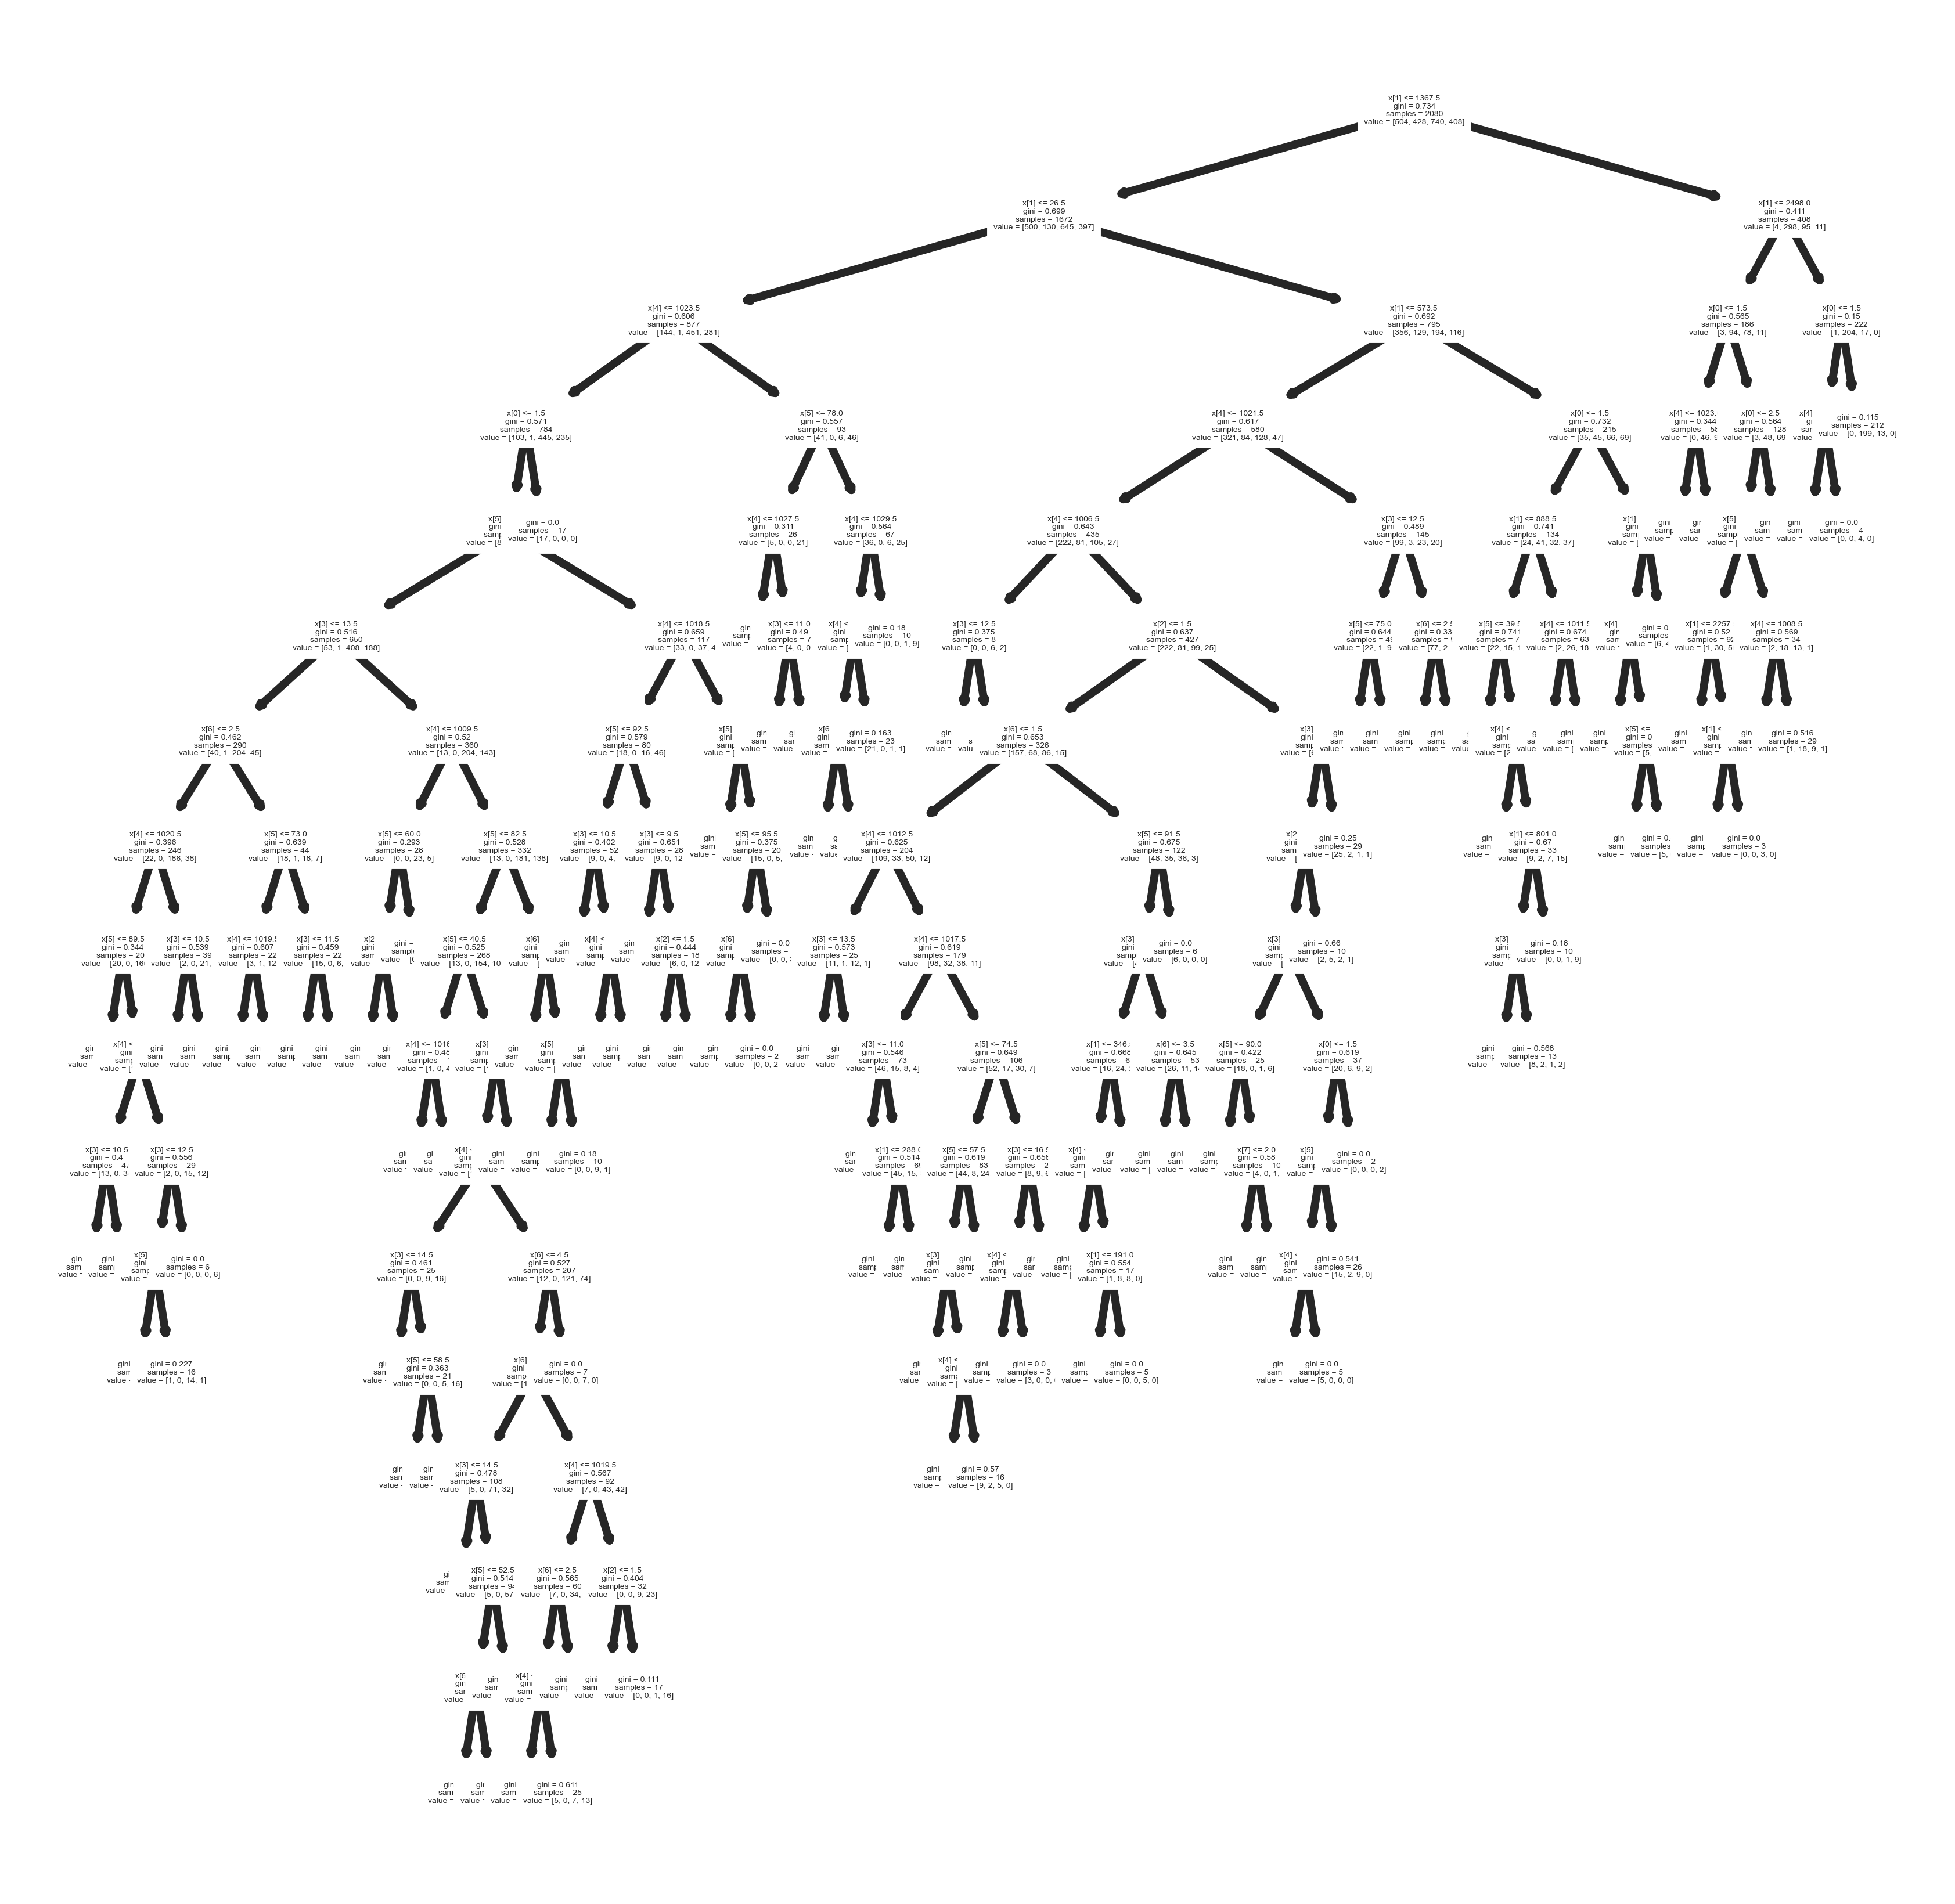

#### 2. Evaluate the model with confusion matrix  and classification report

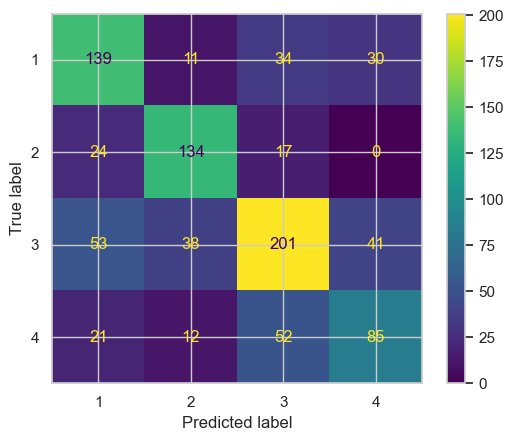

              precision    recall  f1-score   support

           1       0.59      0.65      0.62       214
           2       0.69      0.77      0.72       175
           3       0.66      0.60      0.63       333
           4       0.54      0.50      0.52       170

    accuracy                           0.63       892
   macro avg       0.62      0.63      0.62       892
weighted avg       0.63      0.63      0.62       892

